# CLUSTERING MODEL A

IN THIS CLUSTERING THE MODEL IS USING 2 FEATURES WHICH IS **'FUEL' AND 'MODEL'**

*   THE CLUSTERING PROCESS THAT IS USED IN THIS MODEL IS **K-MEANS ALGORITHM**
*   THERE ARE **IMPUTATION OF THE MISSING VALUE** USING THE MODUS OF THE DATA IN THIS MODEL
*   THERE ARE NORMALIZATION OF THE DATA USING **MIN MAX NORMALIZATION** IN THIS MODEL



In [0]:
from google.colab import files
uploaded = files.upload()

Saving used_cars.csv to used_cars.csv


**Read the Dataset**

In [0]:
import pandas as pd
import io
df1 = pd.read_csv(io.BytesIO(uploaded['used_cars.csv']))

In [0]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    20001 non-null  int64  
 1   id            20001 non-null  int64  
 2   url           20001 non-null  object 
 3   region        20001 non-null  object 
 4   region_url    20001 non-null  object 
 5   price         20001 non-null  int64  
 6   year          19989 non-null  float64
 7   manufacturer  19296 non-null  object 
 8   model         19736 non-null  object 
 9   condition     10849 non-null  object 
 10  cylinders     12916 non-null  object 
 11  fuel          19928 non-null  object 
 12  odometer      17612 non-null  float64
 13  title_status  19891 non-null  object 
 14  transmission  19811 non-null  object 
 15  vin           13356 non-null  object 
 16  drive         15359 non-null  object 
 17  size          6886 non-null   object 
 18  type          16342 non-nu

In [0]:
#counts the value of 'fuel'
df1['fuel'].value_counts()

gas         17599
diesel       1660
other         455
hybrid        185
electric       29
Name: fuel, dtype: int64

In [0]:
#counts the value of 'model'
df1['model'].value_counts()

f-150                           450
1500                            325
silverado 1500                  212
civic                           191
silverado                       187
                               ... 
charger srt                       1
tundra crewmax limited            1
1500 st quad cab 4wd              1
cargo van tradesman               1
FOED TRANSIT CONNECT 2.0L XL      1
Name: model, Length: 4144, dtype: int64

**Data Preprocessing**

In this phase we do the Data Preprocessing to our datasets

1. **Drop** the Unnecesary Columns

in this phase we drop all the columns except 'Fuel' and 'Model' columns, since the data that we are using to clustering is 'Fuel' and 'Model'

In [0]:
# drop some columns
df1 = df1.drop(columns=['region_url', 'image_url','Unnamed: 0', 'year', 'price', 'county','url','cylinders','title_status','vin','paint_color', 'description','long','lat','size','condition','id','manufacturer','state','region','odometer','transmission','drive','type'])

In [0]:
#search the missing value on the data
df1.isnull().sum()

model    265
fuel      73
dtype: int64

2. **Fill the Missing Value** of the Data

In [0]:
categorical = ['fuel','model']
for cat in categorical:
    df1[cat] = df1[cat].fillna(df1[cat].mode().values[0])

In [0]:
df1.isnull().sum()

model    0
fuel     0
dtype: int64

In [0]:
dfnew = pd.DataFrame(df1)
dfnew

,model,fuel
0,golf r,gas
1,f-150,gas
2,sierra 1500,gas
3,f-150,gas
4,f-450,diesel
...,...,...
19996,cummin 2500 laramie,diesel
19997,sentra,gas
19998,grand cherokee limited,gas
19999,corolla,gas


In [0]:
df = pd.DataFrame(df1)
df

,model,fuel
0,golf r,gas
1,f-150,gas
2,sierra 1500,gas
3,f-150,gas
4,f-450,diesel
...,...,...
19996,cummin 2500 laramie,diesel
19997,sentra,gas
19998,grand cherokee limited,gas
19999,corolla,gas


3. **Encode the Columns**, in this phase we transform the non numerical labels  which is 'Fuel' and 'Model' to numerical labels

In [0]:
#import skleaen 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

model         = le.fit_transform(df['model'])
fuel          = le.fit_transform(df['fuel'])

df['model'] = model
df['fuel']  = fuel

4. **Data Normalization** , in this phase we normalize the data that we are going to use using MinMaxScaler()

In [0]:
from sklearn.preprocessing import MinMaxScaler
#assign the MinMaxScaler()
scaler = MinMaxScaler()
newarr = scaler.fit_transform(df)
newarr


array([[0.53029206, 0.5       ],
       [0.42577842, 0.5       ],
       [0.79290369, 0.5       ],
       ...,
       [0.53680908, 0.5       ],
       [0.30798938, 0.5       ],
       [0.08979001, 0.5       ]])

In [0]:
# change the normalize result to the dataframe
#change newarr to xdf
xdf =pd.DataFrame(data = newarr,columns=['model','fuel',])
xdf

,model,fuel
0,0.530292,0.5
1,0.425778,0.5
2,0.792904,0.5
3,0.425778,0.5
4,0.444847,0.0
...,...,...
19996,0.332851,0.0
19997,0.782525,0.5
19998,0.536809,0.5
19999,0.307989,0.5


In [0]:
#save the data exploration result to csv
xdf.head()
xdf.to_csv('clusteringmodA.csv')

- **elbow method to define the optimal K**

from the elbow method below we know that the optimal value of k for our clustering is 7



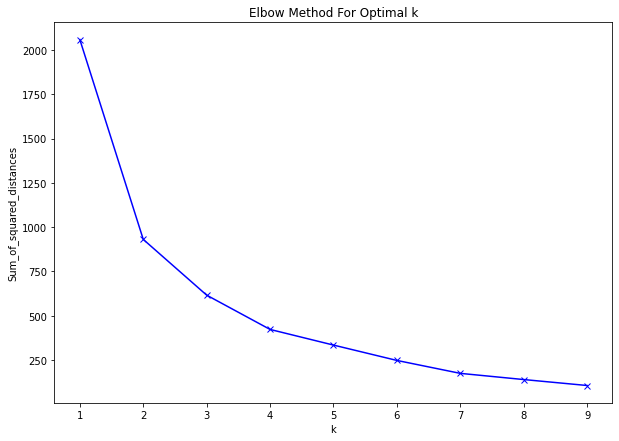

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(xdf)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(10,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Plot The Data** , in this phase we trying to visualize the data that we are going to use as our clustering label.

we are using **State** and **Region** as the data that we are going to clusters 

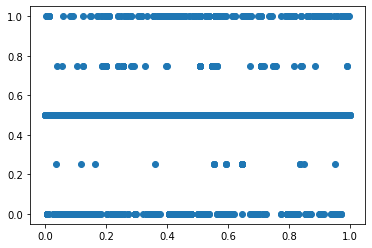

In [0]:
#import the library, and plot the data 
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(xdf['model'], xdf['fuel'], 'o')
plt.show()

In [0]:
#change our previous dataframe into array
#change xdf to newdf
#import the numpy library

import numpy as np
newdf = np.array(xdf)
newdf

array([[0.53029206, 0.5       ],
       [0.42577842, 0.5       ],
       [0.79290369, 0.5       ],
       ...,
       [0.53680908, 0.5       ],
       [0.30798938, 0.5       ],
       [0.08979001, 0.5       ]])

**Clustering Process**

in this phase we begin to do the clustering process

In [0]:
#in this process, we shape the data
# we assign 'm' as our number of training example (m is 20001)
# we assign n as our number of features (n is 2)
m = newdf.shape[0] 
n = newdf.shape[1] 

In [0]:
m

20001

In [0]:
n

2

*   Assign the **K value**

In [0]:
K= 7

*   **Initialize the Centroids** randomly from our data points

In [0]:
Centroids=np.array([]).reshape(n,0)

In [0]:
Centroids

array([], shape=(2, 0), dtype=float64)

In [0]:
import random
for i in range(K):
    rand=random.randint(700,m-1)
    Centroids=np.c_[Centroids,newdf[rand]]
    Output={}

In [0]:
Centroids

array([[0.37702148, 0.97031137, 0.81317886, 0.28071446, 0.39898624,
        0.37798697, 0.2754043 ],
       [0.        , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       ]])

**Compute the Euclidian Distance** from the centroids and assign the cluster base on the minimal distance

In [0]:
#initialize the euclidian distance
EuclideDist=np.array([]).reshape(m,0)
for k in range(K):
       #compute the euclidian distance (find the minimum distance)
       tempDist=np.sum((newdf-Centroids[:,k])**2,axis=1)
       EuclideDist=np.c_[EuclideDist,tempDist]
#store the  minimum ditance and the index to C
C = np.argmin(EuclideDist,axis=1)+1

In [0]:
EuclideDist

array([[2.73491870e-01, 1.93616993e-01, 8.00249399e-02, ...,
        1.72412176e-02, 2.31968413e-02, 6.49677715e-02],
       [2.52377239e-01, 2.96516131e-01, 1.50079097e-01, ...,
        7.17820887e-04, 2.28402322e-03, 2.26123775e-02],
       [4.22958013e-01, 3.14734834e-02, 4.11082232e-04, ...,
        1.55170958e-01, 1.72155890e-01, 2.67805625e-01],
       ...,
       [2.75532075e-01, 1.87924238e-01, 7.63802555e-02, ...,
        1.89951335e-02, 2.52244625e-02, 6.83324586e-02],
       [2.54765431e-01, 4.38670417e-01, 2.55216407e-01, ...,
        8.28042893e-03, 4.89966209e-03, 1.06178765e-03],
       [3.32501920e-01, 7.75317868e-01, 5.23291426e-01, ...,
        9.56023115e-02, 8.30574870e-02, 3.44526643e-02]])

In [0]:
tempDist

array([0.06496777, 0.02261238, 0.26780563, ..., 0.06833246, 0.00106179,
       0.03445266])

In [0]:
#anggota centroid awal , dati cluster 1-7 , 
C

array([5, 5, 3, ..., 5, 4, 7])

In [0]:
EuclideDist

array([[2.73491870e-01, 1.93616993e-01, 8.00249399e-02, ...,
        1.72412176e-02, 2.31968413e-02, 6.49677715e-02],
       [2.52377239e-01, 2.96516131e-01, 1.50079097e-01, ...,
        7.17820887e-04, 2.28402322e-03, 2.26123775e-02],
       [4.22958013e-01, 3.14734834e-02, 4.11082232e-04, ...,
        1.55170958e-01, 1.72155890e-01, 2.67805625e-01],
       ...,
       [2.75532075e-01, 1.87924238e-01, 7.63802555e-02, ...,
        1.89951335e-02, 2.52244625e-02, 6.83324586e-02],
       [2.54765431e-01, 4.38670417e-01, 2.55216407e-01, ...,
        8.28042893e-03, 4.89966209e-03, 1.06178765e-03],
       [3.32501920e-01, 7.75317868e-01, 5.23291426e-01, ...,
        9.56023115e-02, 8.30574870e-02, 3.44526643e-02]])

**Compute the Clusters using K-Means Clustering**

In [0]:
#create the output dictionary A (temporary dictionary)
A={}

#Regroup the datapoints based on the cluster(K) and index C and store it on A
for k in range(K):
    A[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    A[C[i]]=np.c_[A[C[i]],newdf[i]]    
for k in range(K):
    A[k+1]=A[k+1].T
for k in range(K):
     #assign the new centroids by compute the mean of clusters
     Centroids[:,k]=np.mean(A[k+1],axis=0)

In [0]:
#Repeat the step 2 until its convergence (no data points in moving)
n_iter = 7 #assign the iteration value
for i in range(n_iter):
      EuclideDist=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((newdf-Centroids[:,k])**2,axis=1)
          EuclideDist=np.c_[EuclideDist,tempDist]
      C=np.argmin(EuclideDist,axis=1)+1
      A={}
      for k in range(K):
          A[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          A[C[i]]=np.c_[A[C[i]],newdf[i]]
     
      for k in range(K):
          A[k+1]=A[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(A[k+1],axis=0)
      Output=A

In [0]:
#final clusters
C

array([5, 6, 3, ..., 5, 4, 7])

**Visualize the Result**

<Figure size 432x288 with 0 Axes>

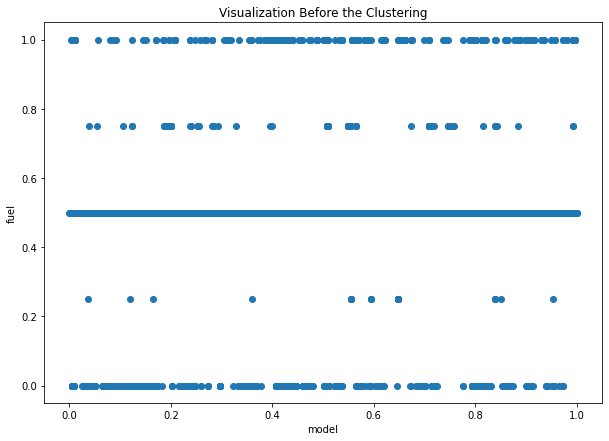

In [0]:
fig = plt.figure()
plt.figure(figsize=(10,7))
plt.title('Visualization Before the Clustering')
plt.xlabel('model')
plt.ylabel('fuel')
plt.plot(xdf['model'], xdf['fuel'], 'o')
plt.show()

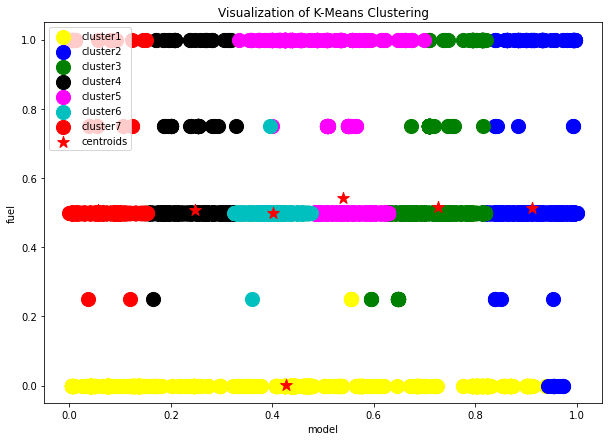

In [0]:
#Visualization after the data being clustered
color=['yellow','b','g','k','magenta','c','r']
labels=['cluster1','cluster2','cluster3', 'cluster4','cluster5', 'cluster6', 'cluster7']
plt.figure(figsize=(10,7))
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],s=200,label=labels[k])
plt.title('Visualization of K-Means Clustering')
plt.scatter(Centroids[0,:],Centroids[1,:],s=150,c='red',marker='*',label='centroids')
plt.xlabel('model')
plt.ylabel('fuel')
plt.legend()
plt.show()

**Result of the Centroids**
	
1. The first centroid (centroid 0 at cluster 1) at label x = 0.885244 and y = 0.518309
2. The second Centroid (centroid 1 at cluster 2) at label x = 0.457366  and y = 0.525652
3. The third centroid (centroid 2 at cluster 3) at label x = 0.103518 and y = 0.001359
4. The fourth centroid (centroid 3 at cluster 4) at label x = 0.065714  and y = 0.507143
5. The fourth centroid (centroid 4 at cluster 5) at label x = 0.264734 and y = 0.505444
6. The fourth centroid (centroid 5 at cluster 6) at label x = 0.676353 and y = 0.510696
7. The fourth centroid (centroid 6 at cluster 7) at label x = 0.592405  and y = 0.004421

In [0]:
#Assign the centroids point to dataframe
Centroids = pd.DataFrame (data= Centroids)
Centroids

,0,1,2,3,4,5,6
0,0.426516,0.912763,0.726995,0.246850,0.538949,0.401664,0.056505
1,0.000606,0.512673,0.514787,0.506798,0.543211,0.500000,0.506928


In [0]:
dfnew['clusters'] = C
dfnew

,model,fuel,clusters
0,2197,2,5
1,1764,2,6
2,3285,2,3
3,1764,2,6
4,1843,0,1
...,...,...,...
19996,1379,0,1
19997,3242,2,3
19998,2224,2,5
19999,1276,2,4


**Result of the Clusters**

in this phase we assign all the member of clusters to a dataframe
- column 0 of the data frame means that  label x (model points) and column 1 means that label y (fuel points)

**Result**
- cluster 1  has 4465 of data member
- cluster 2 has 4561 of data member
- cluster 3 has 552 of data member
- cluster 4 has 1855 of data  member
- cluster 5 has 3674 of data member
- cluster 6 has 3763 of data member
- cluster 7 has 1131 of data member

so, the biggest cluster is cluster 2, since it has biggest data member than other clusters. the sum value of cluster 1 and to also almost have similar value.

In [0]:
# assign the value data points that member of cluster 1 into dataframe
Cluster1 = pd.DataFrame(data = Output[1])
Cluster1

,0,1
0,0.444847,0.0
1,0.439054,0.0
2,0.425778,0.0
3,0.425778,0.0
4,0.040068,0.0
...,...,...
1646,0.808593,0.0
1647,0.040068,0.0
1648,0.472604,0.0
1649,0.829592,0.0


In [0]:
# assign the value data points that member of cluster 2 into dataframe
Cluster2 = pd.DataFrame(data = Output[2])
Cluster2

,0,1
0,0.992035,1.00
1,0.931451,0.50
2,0.960657,0.50
3,0.851074,0.25
4,0.931451,0.50
...,...,...
3388,0.964760,0.50
3389,0.883659,0.50
3390,0.960898,0.50
3391,0.996138,0.50


In [0]:
# assign the value data points that member of cluster 3 into dataframe
Cluster3 = pd.DataFrame(data = Output[3])
Cluster3


,0,1
0,0.792904,0.5
1,0.792662,0.5
2,0.792662,0.5
3,0.812696,0.5
4,0.759594,0.5
...,...,...
3985,0.818489,0.5
3986,0.818972,0.5
3987,0.750422,0.5
3988,0.651219,0.5


In [0]:
# assign the value data points that member of cluster 4 into dataframe
Cluster4 = pd.DataFrame(data = Output[4])
Cluster4

,0,1
0,0.280714,0.5
1,0.280714,0.5
2,0.291576,0.5
3,0.203476,0.5
4,0.172098,0.5
...,...,...
3305,0.307989,0.5
3306,0.321989,0.5
3307,0.307989,0.5
3308,0.306541,0.5


In [0]:
# assign the value data points that member of cluster 5 into dataframe
Cluster5 = pd.DataFrame(data = Output[5])
Cluster5

,0,1
0,0.530292,0.5
1,0.555636,0.5
2,0.555636,0.5
3,0.555636,0.5
4,0.532464,0.5
...,...,...
2882,0.548636,0.5
2883,0.537050,0.5
2884,0.425778,1.0
2885,0.538016,0.5


In [0]:
# assign the value data points that member of cluster 6  into dataframe
Cluster6 = pd.DataFrame(data = Output[6])
Cluster6

,0,1
0,0.425778,0.5
1,0.425778,0.5
2,0.425778,0.5
3,0.433985,0.5
4,0.433985,0.5
...,...,...
3069,0.377987,0.5
3070,0.432295,0.5
3071,0.416848,0.5
3072,0.389573,0.5


In [0]:
# assign the value data points that member of cluster 7 into dataframe
Cluster7 = pd.DataFrame(data = Output[7])
Cluster7

,0,1
0,0.004103,0.5
1,0.004103,0.5
2,0.051895,0.5
3,0.050447,0.5
4,0.004103,0.5
...,...,...
1691,0.010138,0.5
1692,0.041516,0.5
1693,0.029930,0.5
1694,0.070239,0.5


In [0]:
#clustered dataframe
dfnew['clusters'] = C
dfnew

,model,fuel,clusters
0,2197,2,5
1,1764,2,6
2,3285,2,3
3,1764,2,6
4,1843,0,1
...,...,...,...
19996,1379,0,1
19997,3242,2,3
19998,2224,2,5
19999,1276,2,4


In [0]:
df

,model,fuel
0,2197,2
1,1764,2
2,3285,2
3,1764,2
4,1843,0
...,...,...
19996,1379,0
19997,3242,2
19998,2224,2
19999,1276,2
